<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [84]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [85]:
house = pd.read_csv('/Users/laurakunstler/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')
info = open('/Users/laurakunstler/Desktop/DSI-SF-4/datasets/housing_regression/data_description.txt', 'r')
print info.read()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [86]:
house.shape

(1460, 81)

In [87]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalePrice` variable and describe it with pandas

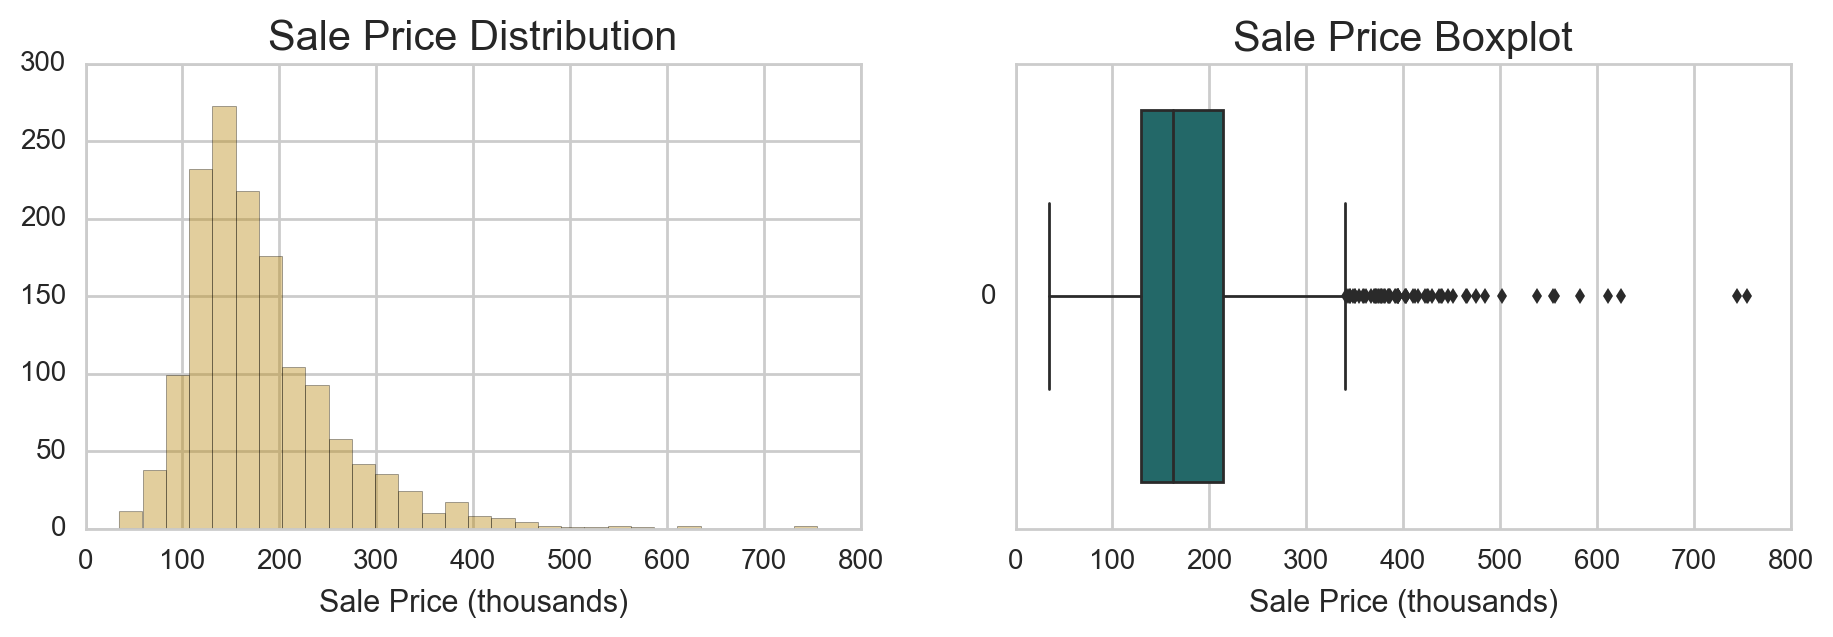

In [88]:
fig, axis_array = plt.subplots(1, 2, figsize = (11, 3))

ax1 = sns.distplot(house['SalePrice'], kde = False, bins = 30, ax = axis_array[0], color = 'darkgoldenrod')
ax2 = sns.boxplot(data = house['SalePrice'], fliersize = 4, saturation = 0.5, linewidth = 1, orient = 'h', color = 'darkcyan', ax = axis_array[1])

ax1.set_title('Sale Price Distribution', fontsize = 15)
ax1.set_xticklabels(range(0, 900, 100))
ax1.set_xlabel('Sale Price (thousands)')
ax2.set_title('Sale Price Boxplot' ,  fontsize = 15)
ax2.set_xticklabels(range(0, 900, 100))
ax2.set_xlabel('Sale Price (thousands)')
plt.show()

### 2.2 Create a transformed version of the `SalePrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

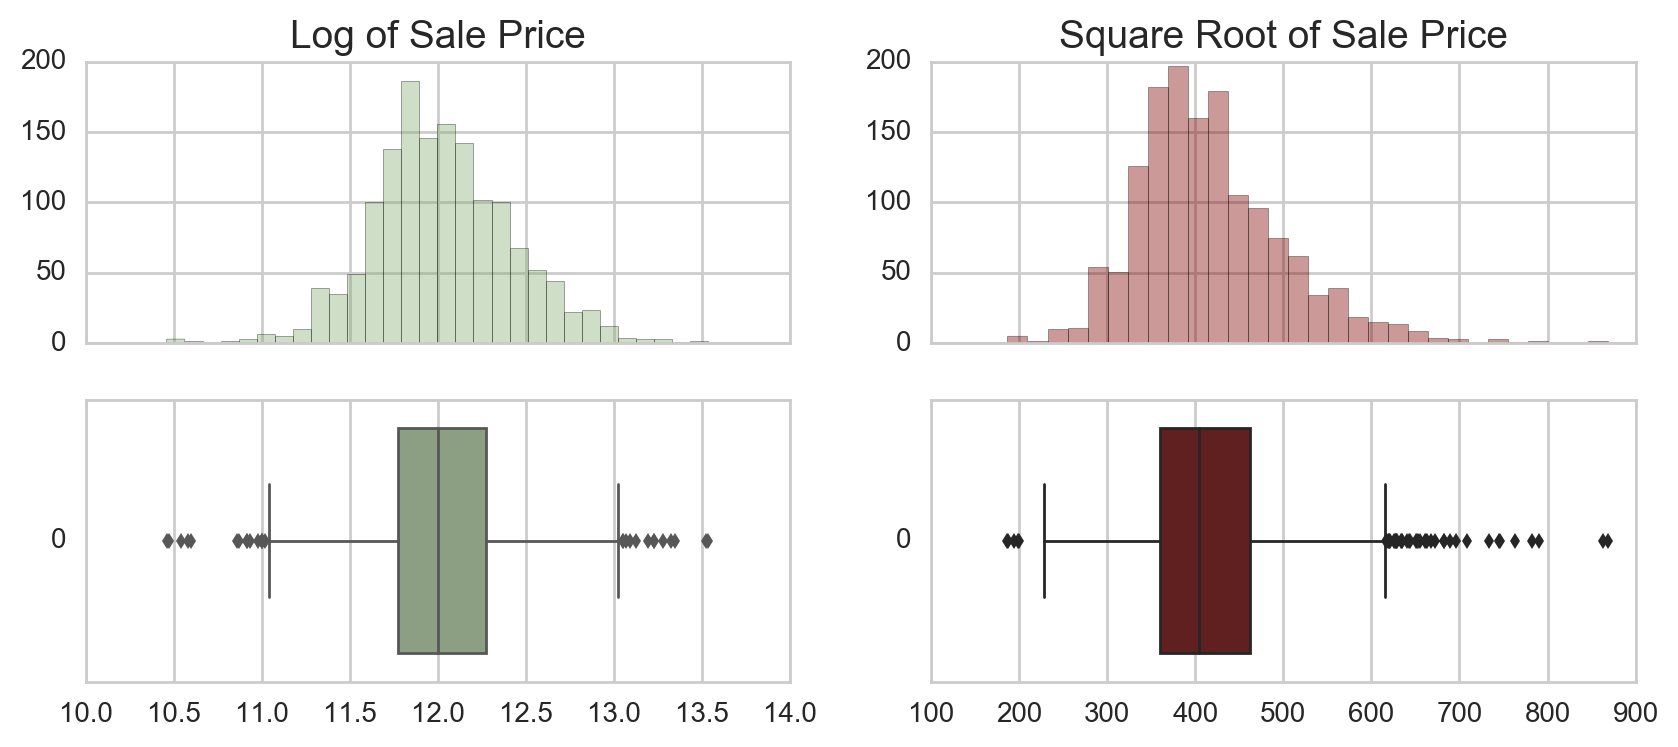

In [89]:
log_sales = np.log(house['SalePrice'])
sqrt_sales = (house['SalePrice']) ** 0.5

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 4))

sns.distplot(log_sales, kde = False, bins = 30, ax = ax1, color = 'sage')
sns.distplot(sqrt_sales, kde = False, bins = 30, ax = ax2, color = 'maroon')
sns.boxplot(data = log_sales, fliersize = 4, saturation = 0.5, linewidth = 1, orient = 'h', color = 'sage', ax = ax3)
sns.boxplot(data = sqrt_sales, fliersize = 4, saturation = 0.5, linewidth = 1, orient = 'h', color = 'maroon', ax = ax4)

ax1.set_title('Log of Sale Price', fontsize = 14)
ax2.set_title('Square Root of Sale Price' ,  fontsize = 14)
ax1.set_xlabel('')
ax1.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax2.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax2.set_xlabel('')

plt.show()

I tried both a square root and a log transformation of the sales price column, and it looks as if the log transformation gave me a distribution that was closer to a normal distribution.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [90]:
house['LogSalePrice'] = log_sales
house['AgeSold'] = house['YrSold'] - house['YearBuilt']
house[['AgeSold', 'SalePrice']].corr()

,AgeSold,SalePrice
AgeSold,1.00000,-0.52335
SalePrice,-0.52335,1.00000


In [91]:
house[['AgeSold', 'LogSalePrice']].corr()

,AgeSold,LogSalePrice
AgeSold,1.00000,-0.58729
LogSalePrice,-0.58729,1.00000


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

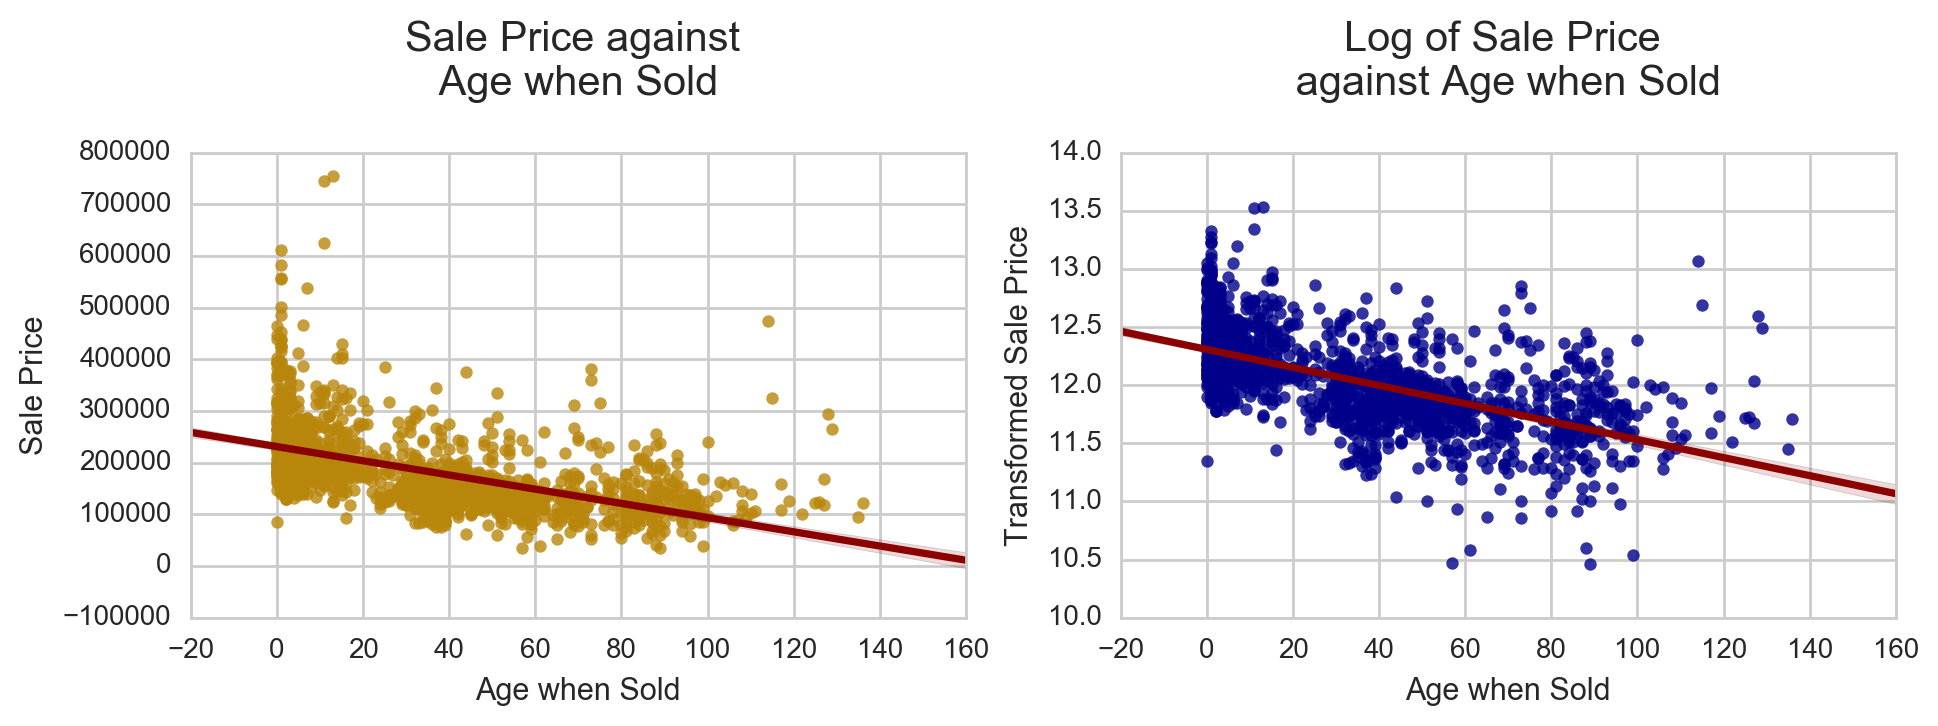

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 3))

sns.regplot(house['AgeSold'], house['SalePrice'], ax = ax1,
           scatter_kws = {'color': 'darkgoldenrod'}, line_kws = {'color':'darkred'})
sns.regplot(house['AgeSold'], house['LogSalePrice'], ax = ax2, 
           scatter_kws = {'color': 'darkblue'}, line_kws = {'color':'darkred'})

ax1.set_title('Sale Price against \n Age when Sold \n', fontsize = 15)
ax1.set_xlabel('Age when Sold')
ax1.set_ylabel('Sale Price')
ax2.set_title('Log of Sale Price \n against Age when Sold \n' ,  fontsize = 15)
ax2.set_xlabel('Age when Sold')
ax2.set_ylabel('Transformed Sale Price')
ax2.set_ylim(10, 14)

plt.show()

### I'm not sure what I'm supposed to see here, come back to this!

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

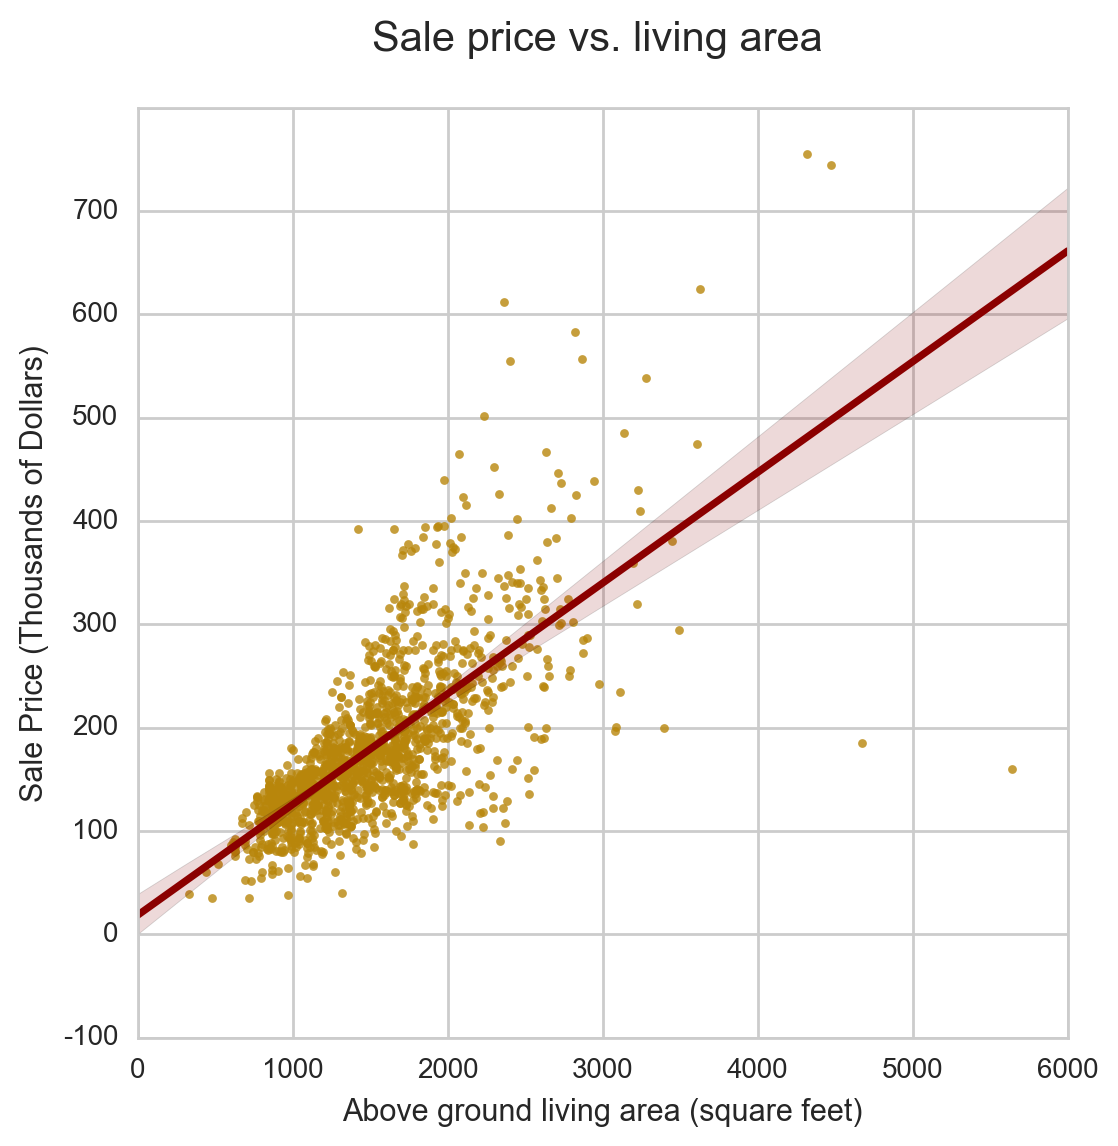

In [93]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

sns.regplot(house['GrLivArea'], house['SalePrice'], ax = ax, 
           scatter_kws = {'color': 'darkgoldenrod', 's': 10}, line_kws = {'color':'darkred'})
ax.set_title('Sale price vs. living area \n', fontsize = 15)
ax.set_xlabel('Above ground living area (square feet)')
ax.set_ylabel('Sale Price (Thousands of Dollars)')
ax.set_yticklabels(range(-100, 800, 100))


### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data
Why did you choose those variables? What is the relationship that the chart shows, if any?

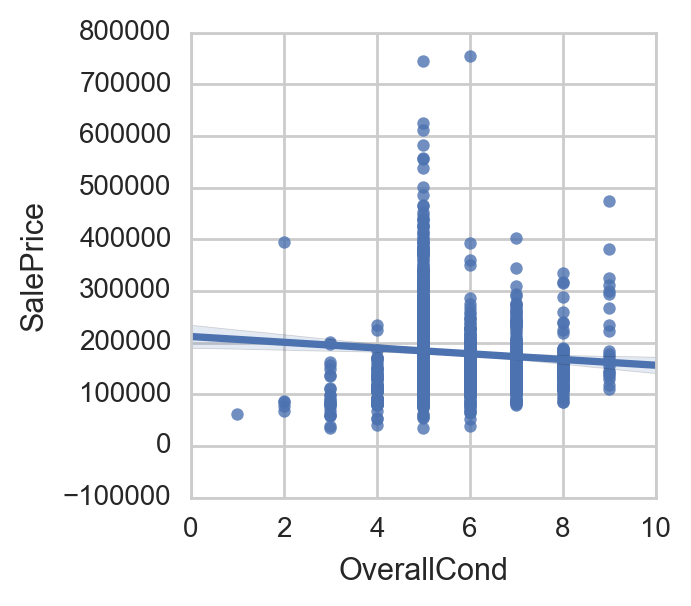

In [94]:
fig, ax = plt.subplots(1, 1, figsize = (3, 3))

sns.regplot(house['OverallCond'], house['SalePrice'], ax = ax)

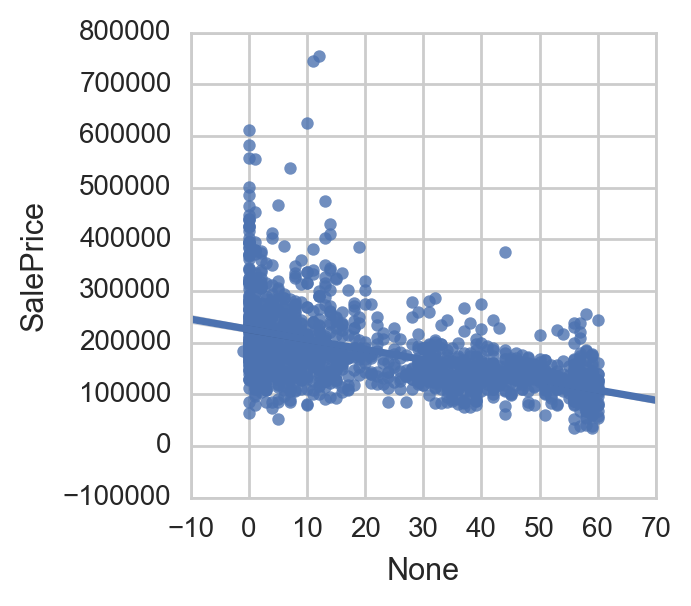

In [95]:
remod = house['YrSold'] - house['YearRemodAdd']

fig, ax = plt.subplots(1, 1, figsize = (3, 3))

sns.regplot(remod, house['SalePrice'], ax = ax)

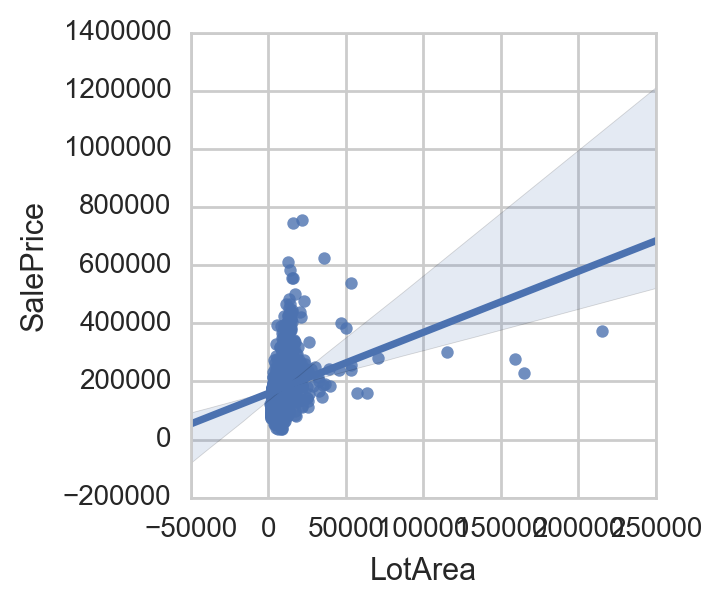

In [96]:
fig, ax = plt.subplots(1, 1, figsize = (3, 3))

sns.regplot(house['LotArea'], house['SalePrice'], ax = ax)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

Here are the Zoning Codes listed in the information file:

Code | Zone | Code | Zone
--- | --- | --- | ---
A | Agriculture | RH | Residential High Density
C | Commercial | RL | Residential Low Density
FV | Floating Village Residential | RP | Residential Low Density Park
I | Industrial | RM | Residential Medium Density

Of these, it seems like five of them are residential. It appears that there were only ten houses in the dataset that were zoned commercial, and their MSZoning Code was actually 'C (all)'. I removed these 10 rows.

In [97]:
house['MSZoning'].value_counts(dropna = False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [98]:
print house.shape
house = house[house['MSZoning'] != 'C (all)']
house.shape

(1460, 83)


(1450, 83)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

I started by making a list of all the columns that have null values, as these are the ones I will need to clean. I'm going to go through these one by one to figure out what to do with them, using the information about the columns to help guide my decisions.

In [99]:
columns_to_clean = [col for col in house.columns if house[col].isnull().any()]
print(columns_to_clean)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#### Lot Frontage
- LotFrontage: Linear feet of street connected to property

In [100]:
house['LotFrontage'].isnull().value_counts()

False    1191
True      259
Name: LotFrontage, dtype: int64

In [101]:
house[(house['LotFrontage'] == 0) | (house['LotFrontage'] == 0.0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice,AgeSold


It seems as if the lot frontage column has 259 null values (about 18% of the houses in the dataset).

There are also no houses that have the lot frontage listed at 0.0.
For this column I am going to make an assumption that a null value means that there are no linear feet of street connected to the property (i.e. the house is set away from the street). I'm going to replace the null values with 0.0.

In [102]:
house['LotFrontage'][house['LotFrontage'].isnull()] = 0.0
house['LotFrontage'].isnull().value_counts()

False    1450
Name: LotFrontage, dtype: int64

#### Alley
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [103]:
house['Alley'].value_counts(dropna = False)

NaN     1361
Grvl      50
Pave      39
Name: Alley, dtype: int64

Most of the Alley column is null, with only 89 non-null values. This means that most houses don't have alleys. I will replace the NaNs with the string 'None', although I suspect that I won't do much with this column anyway.

In [104]:
house['Alley'][house['Alley'].isnull()] = 'None'
house['Alley'].value_counts(dropna = False)

None    1361
Grvl      50
Pave      39
Name: Alley, dtype: int64

#### Masonry Veneer Type and Area

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

In [105]:
house['MasVnrType'].value_counts(dropna = False)

None       854
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [106]:
house['MasVnrArea'].isnull().value_counts()

False    1442
True        8
Name: MasVnrArea, dtype: int64

In [107]:
house['MasVnrArea'].value_counts(dropna = False).head(6)

 0.0      851
NaN         8
 180.0      8
 108.0      8
 72.0       8
 16.0       7
Name: MasVnrArea, dtype: int64

Only 8 of the houses have a null value for this column, but 854 have 'None'. I think it is a safe assumption that the houses with null values do not have masonry veneer considering that the majority of houses do not have masonry veneer. The same reasoning applies to the 'MasVnrArea' column, which contains the area of the masonry veneer in square feet.

In [108]:
house['MasVnrType'][house['MasVnrType'].isnull()] = 'None'
house['MasVnrType'].value_counts()

None       862
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [109]:
house['MasVnrArea'][house['MasVnrArea'].isnull()] = 0.0
house['MasVnrArea'].value_counts().head(6)

0.0      859
108.0      8
72.0       8
180.0      8
120.0      7
16.0       7
Name: MasVnrArea, dtype: int64

#### Basements

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Here they tell my that NA means there is no basement, so I'll simply replace the NaN's with 'NB' for 'No Basement'

In [110]:
house['BsmtQual'].value_counts(dropna = False)

TA     639
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [111]:
house['BsmtQual'][house['BsmtQual'].isnull()] = 'NB'
house['BsmtQual'].value_counts(dropna = False)

TA    639
Gd    618
Ex    121
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [112]:
house['BsmtCond'].value_counts(dropna = False)

TA     1303
Gd       65
Fa       43
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [113]:
house['BsmtCond'][house['BsmtCond'].isnull()] = 'NB'
house['BsmtCond'].value_counts(dropna = False)

TA    1303
Gd      65
Fa      43
NB      37
Po       2
Name: BsmtCond, dtype: int64

In [114]:
house['BsmtExposure'].value_counts(dropna = False)

No     947
Av     219
Gd     134
Mn     112
NaN     38
Name: BsmtExposure, dtype: int64

In [115]:
house['BsmtExposure'][house['BsmtExposure'].isnull()] = 'NB'
house['BsmtExposure'].value_counts(dropna = False)

No    947
Av    219
Gd    134
Mn    112
NB     38
Name: BsmtExposure, dtype: int64

In [116]:
house['BsmtFinType1'].value_counts(dropna = False), house['BsmtFinType2'].value_counts(dropna = False)

(Unf    424
 GLQ    418
 ALQ    220
 BLQ    147
 Rec    130
 LwQ     74
 NaN     37
 Name: BsmtFinType1, dtype: int64, Unf    1246
 Rec      54
 LwQ      46
 NaN      38
 BLQ      33
 ALQ      19
 GLQ      14
 Name: BsmtFinType2, dtype: int64)

In [117]:
house['BsmtFinType1'][house['BsmtFinType1'].isnull()] = 'NB'
house['BsmtFinType2'][house['BsmtFinType2'].isnull()] = 'NB'
house['BsmtFinType1'].value_counts(dropna = False), house['BsmtFinType2'].value_counts(dropna = False)

(Unf    424
 GLQ    418
 ALQ    220
 BLQ    147
 Rec    130
 LwQ     74
 NB      37
 Name: BsmtFinType1, dtype: int64, Unf    1246
 Rec      54
 LwQ      46
 NB       38
 BLQ      33
 ALQ      19
 GLQ      14
 Name: BsmtFinType2, dtype: int64)

#### Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
The only house that had a missing value in the column Electrical was built in 2006, so it has standard circuit breakers & romex. I'll give it the code SBrkr.

In [118]:
house['Electrical'].value_counts(dropna = False)

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [119]:
house[['YearBuilt', 'YearRemodAdd']][house['Electrical'].isnull()]

,YearBuilt,YearRemodAdd
1379,2006,2007


In [120]:
house[['Electrical', 'YearBuilt']].groupby('Electrical').max()

,YearBuilt
Electrical,
FuseA,1960
FuseF,1965
FuseP,1955
Mix,1920
SBrkr,2010


In [121]:
house['Electrical'][house['Electrical'].isnull()] = 'SBrkr'

In [122]:
house['Electrical'].value_counts(dropna = False)

SBrkr    1329
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Fireplaces

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
Again, they tell me that NA is no fireplace, but I checked that with the number of fireplaces just to be sure. I changed the value to 'NF' for 'No Fireplace'. Not sure if this column will be used anyway.

In [123]:
house['FireplaceQu'].value_counts(dropna = False), house['Fireplaces'][house['FireplaceQu'].isnull()].value_counts()

(NaN    681
 Gd     379
 TA     313
 Fa      33
 Ex      24
 Po      20
 Name: FireplaceQu, dtype: int64, 0    681
 Name: Fireplaces, dtype: int64)

In [124]:
house['FireplaceQu'][house['FireplaceQu'].isnull()] = 'NF'
house['FireplaceQu'].value_counts(dropna = False)

NF    681
Gd    379
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Garages
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'

In [125]:
house[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']][house['GarageType'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 39 to 1453
Data columns (total 5 columns):
GarageType      0 non-null object
GarageYrBlt     0 non-null float64
GarageFinish    0 non-null object
GarageQual      0 non-null object
GarageCond      0 non-null object
dtypes: float64(1), object(4)
memory usage: 3.7+ KB


In [126]:
house['GarageArea'][house['GarageType'].isnull()].value_counts()

0    79
Name: GarageArea, dtype: int64

In [127]:
house['GarageType'][house['GarageType'].isnull()]='NG'
house['GarageFinish'][house['GarageFinish'].isnull()] = 'NG'
house['GarageQual'][house['GarageQual'].isnull()] = 'NG'
house['GarageCond'][house['GarageCond'].isnull()] = 'NG'

In [128]:
house[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 5 columns):
GarageType      1450 non-null object
GarageYrBlt     1371 non-null float64
GarageFinish    1450 non-null object
GarageQual      1450 non-null object
GarageCond      1450 non-null object
dtypes: float64(1), object(4)
memory usage: 68.0+ KB


#### Pools

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [129]:
house['PoolQC'][house['PoolQC'].isnull()] = 'No Pool'

In [130]:
house['PoolQC'].value_counts(dropna = False)

No Pool    1443
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

#### Fence and Miscellaneous

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

After looking at the value counts, I found that the vast majority of houses do not have fences or miscellaneous features. I decided to remove both of those columns from my dataset.

In [131]:
house['Fence'].value_counts(dropna = False)

NaN      1172
MnPrv     155
GdPrv      59
GdWo       53
MnWw       11
Name: Fence, dtype: int64

In [132]:
house['MiscFeature'].value_counts(dropna = False) 

NaN     1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [133]:
del house['Fence']
del house['MiscFeature']

In [134]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1450 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            1450 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

I decided to start my process for this one by looking at the distributions of some of the variables I thought I might want to get rid of. If they seem to be stacked with over 1000 rows that had one particular value, I will consider taking them out. 

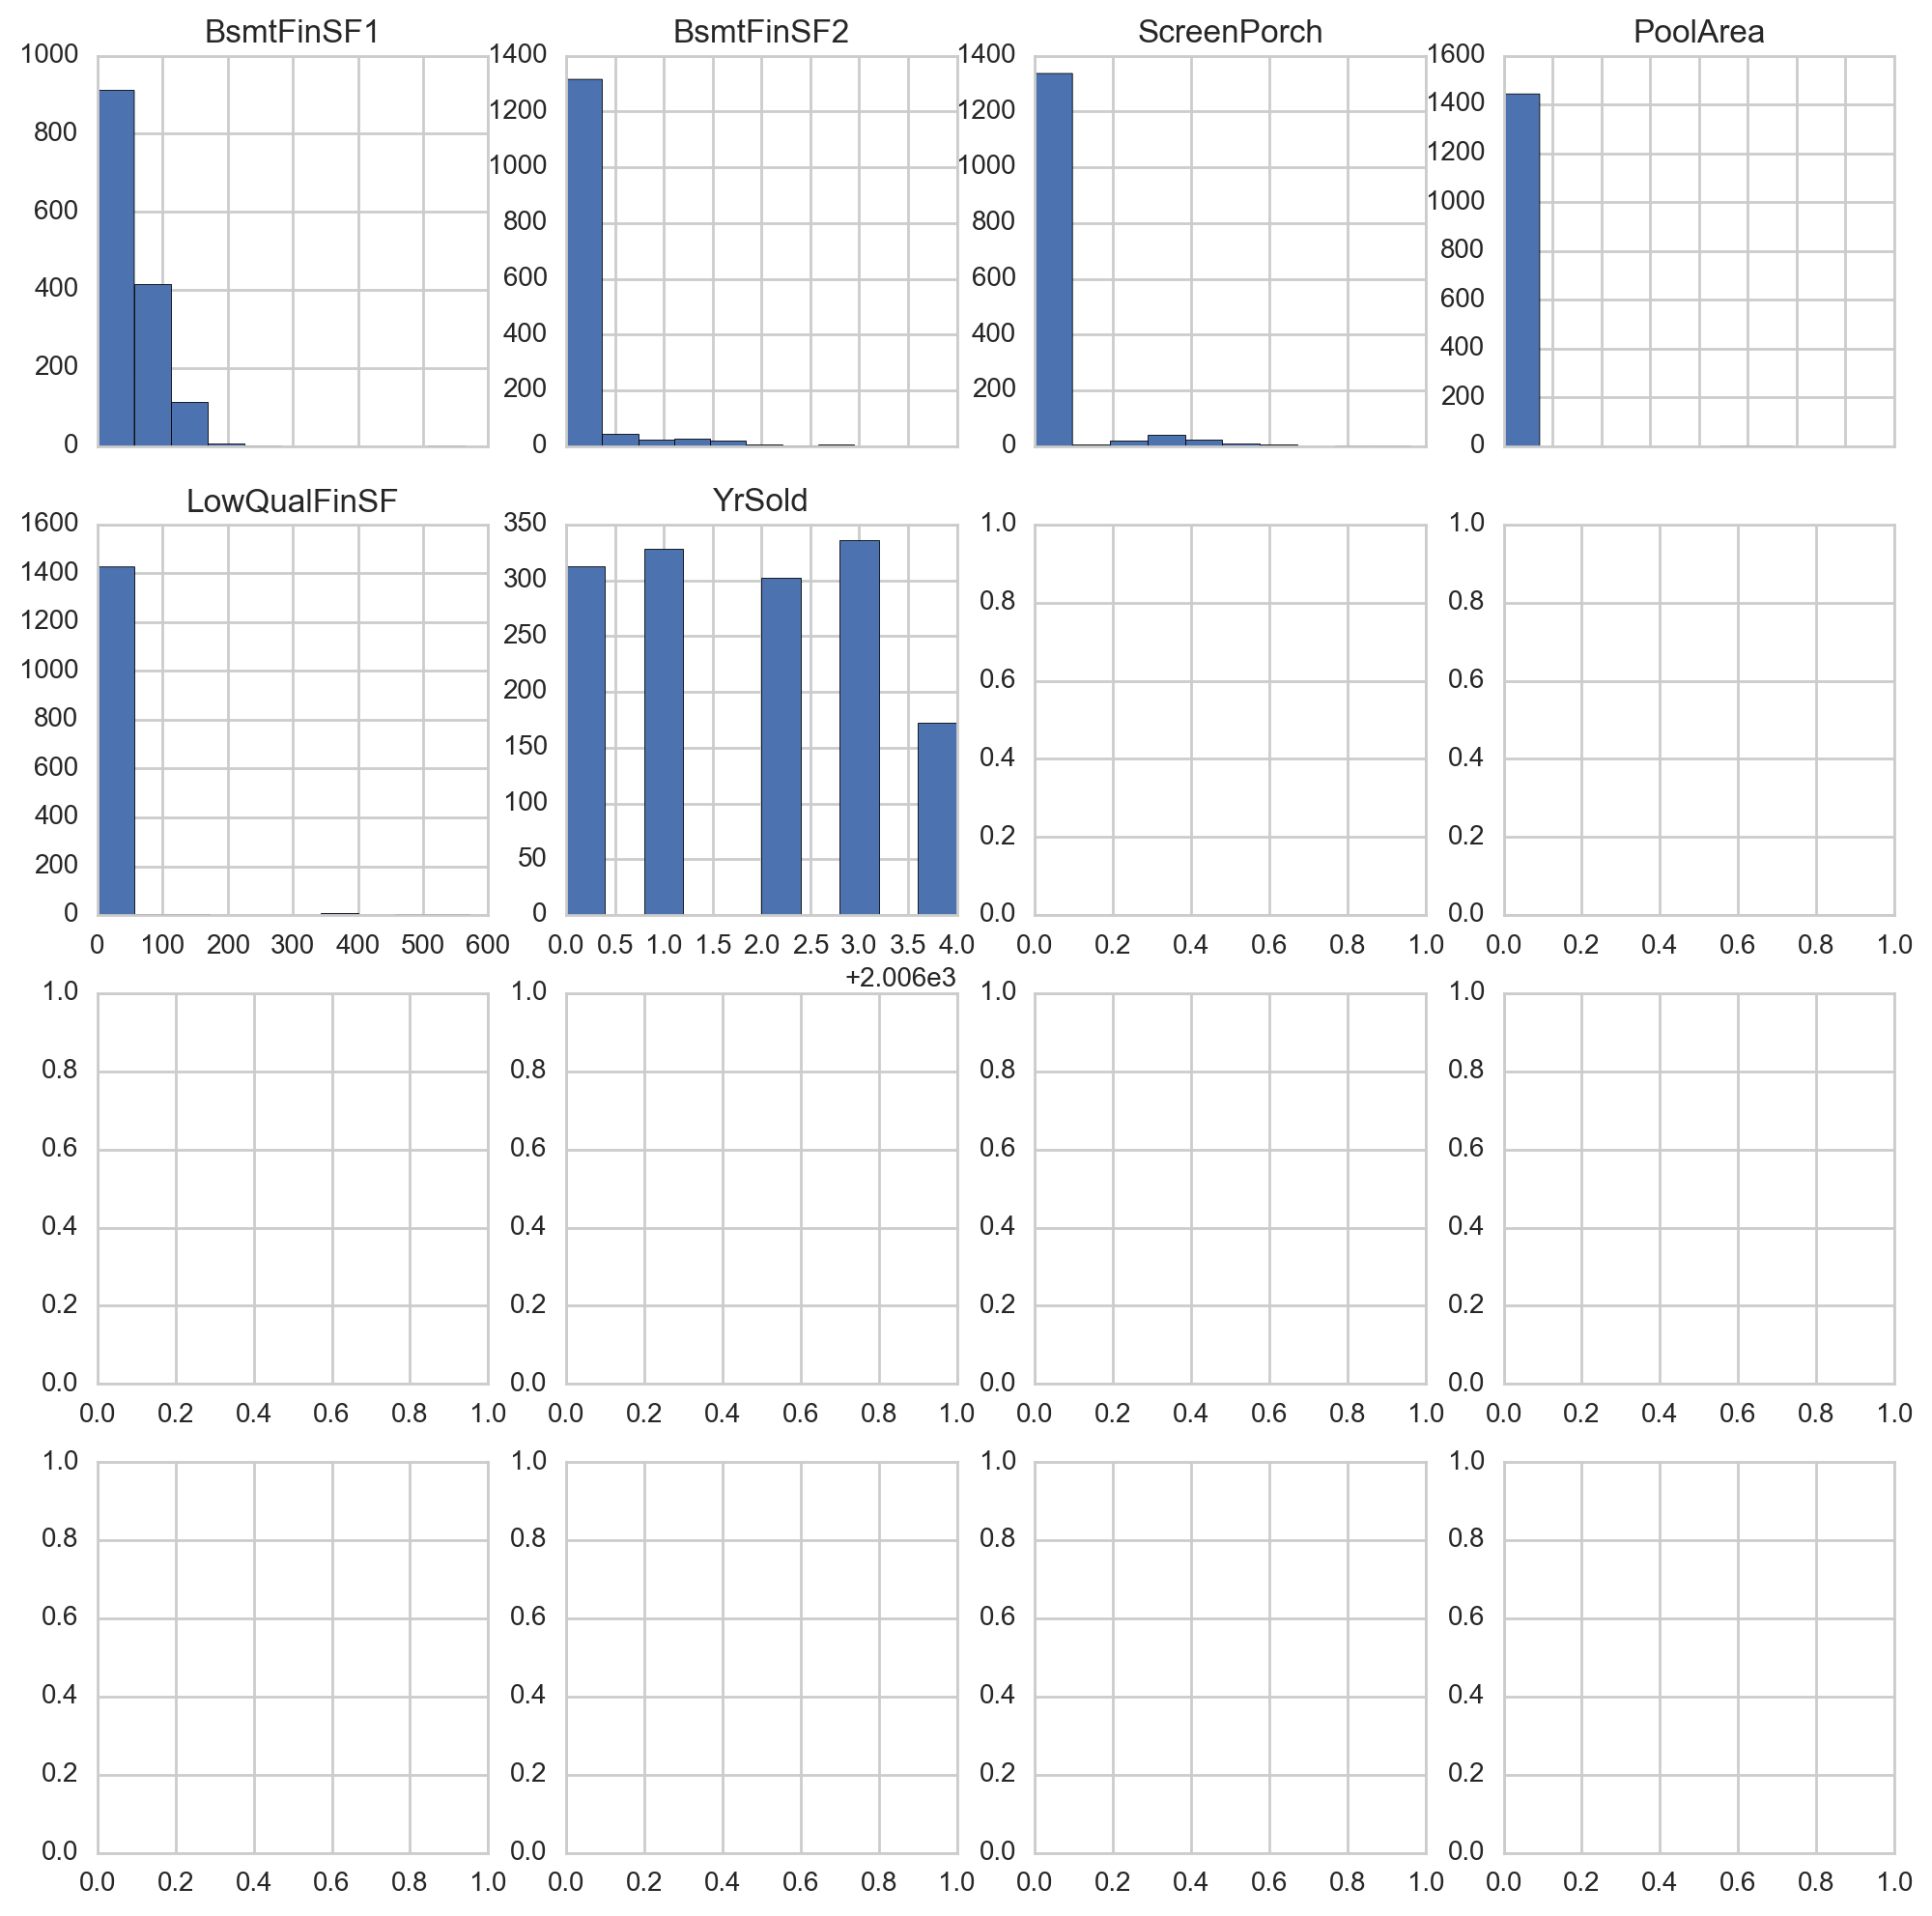

In [143]:
fig, ax_array = plt.subplots(4, 4, figsize = (12, 12))

ax1 = house['BsmtFinSF1'].hist(ax = ax_array[0][0])
ax1.set(title = 'BsmtFinSF1', xticklabels=[])

ax2 = house['BsmtFinSF2'].hist(ax = ax_array[0][1])
ax2.set(title = 'BsmtFinSF2', xticklabels=[])

ax3 = house['ScreenPorch'].hist(ax = ax_array[0][2])
ax3.set(title = 'ScreenPorch', xticklabels=[])

ax4 = house['PoolArea'].hist(ax = ax_array[0][3])
ax4.set(title = 'PoolArea', xticklabels=[])

ax5 = house['LowQualFinSF'].hist(ax = ax_array[1][0])
ax5.set(title = 'LowQualFinSF')

ax6 = house['YrSold'].hist(ax = ax_array[1][1])
ax6.set(title = 'YrSold')

In [137]:
house['Alley'].value_counts()

None    1361
Grvl      50
Pave      39
Name: Alley, dtype: int64

In [139]:
house['LowQualFinSF'].value_counts()

0      1425
80        3
360       2
371       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
572       1
528       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

#### Pool Area and PoolQC:
Although I do think that in certain areas, this might really have an influence on the sale price of the house, in this dataset only 7 houses have pools. Therefore, the vast majority of houses have a zero in the pool area column and no pool in the Pool QC column and I'm going to remove these from my dataset.

#### Alley:
89 houses have alleys and 1361 do not. I think that this column will not be a good predictor of the sale price.

#### Low Quality Finish Square Feet:
The overwhelming number of houses have 0 for this column. While 25 houses do have low quality finish, that is not enough to determine if this variable has a real effect on the price or not. 

#### Basement Finishes:
There is some variation on the values of the basement finish type 1, but most houses only have one type of finish in their basement so the basement finish sf 2 and the basement finish type 2 columns are mostly empty. I'll remove those.


#### Electrical:
I do think that the electrical matters, but also it depends so heavily on the age of the house that any effect will also be shown in the age of the house.

del house['PoolArea']
del house['PoolQC']
del house['Alley']
del house['LowQualFinSF']
del house['BsmtFinSF2']
del house['BsmtFinType2']
del house['Electrical']

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

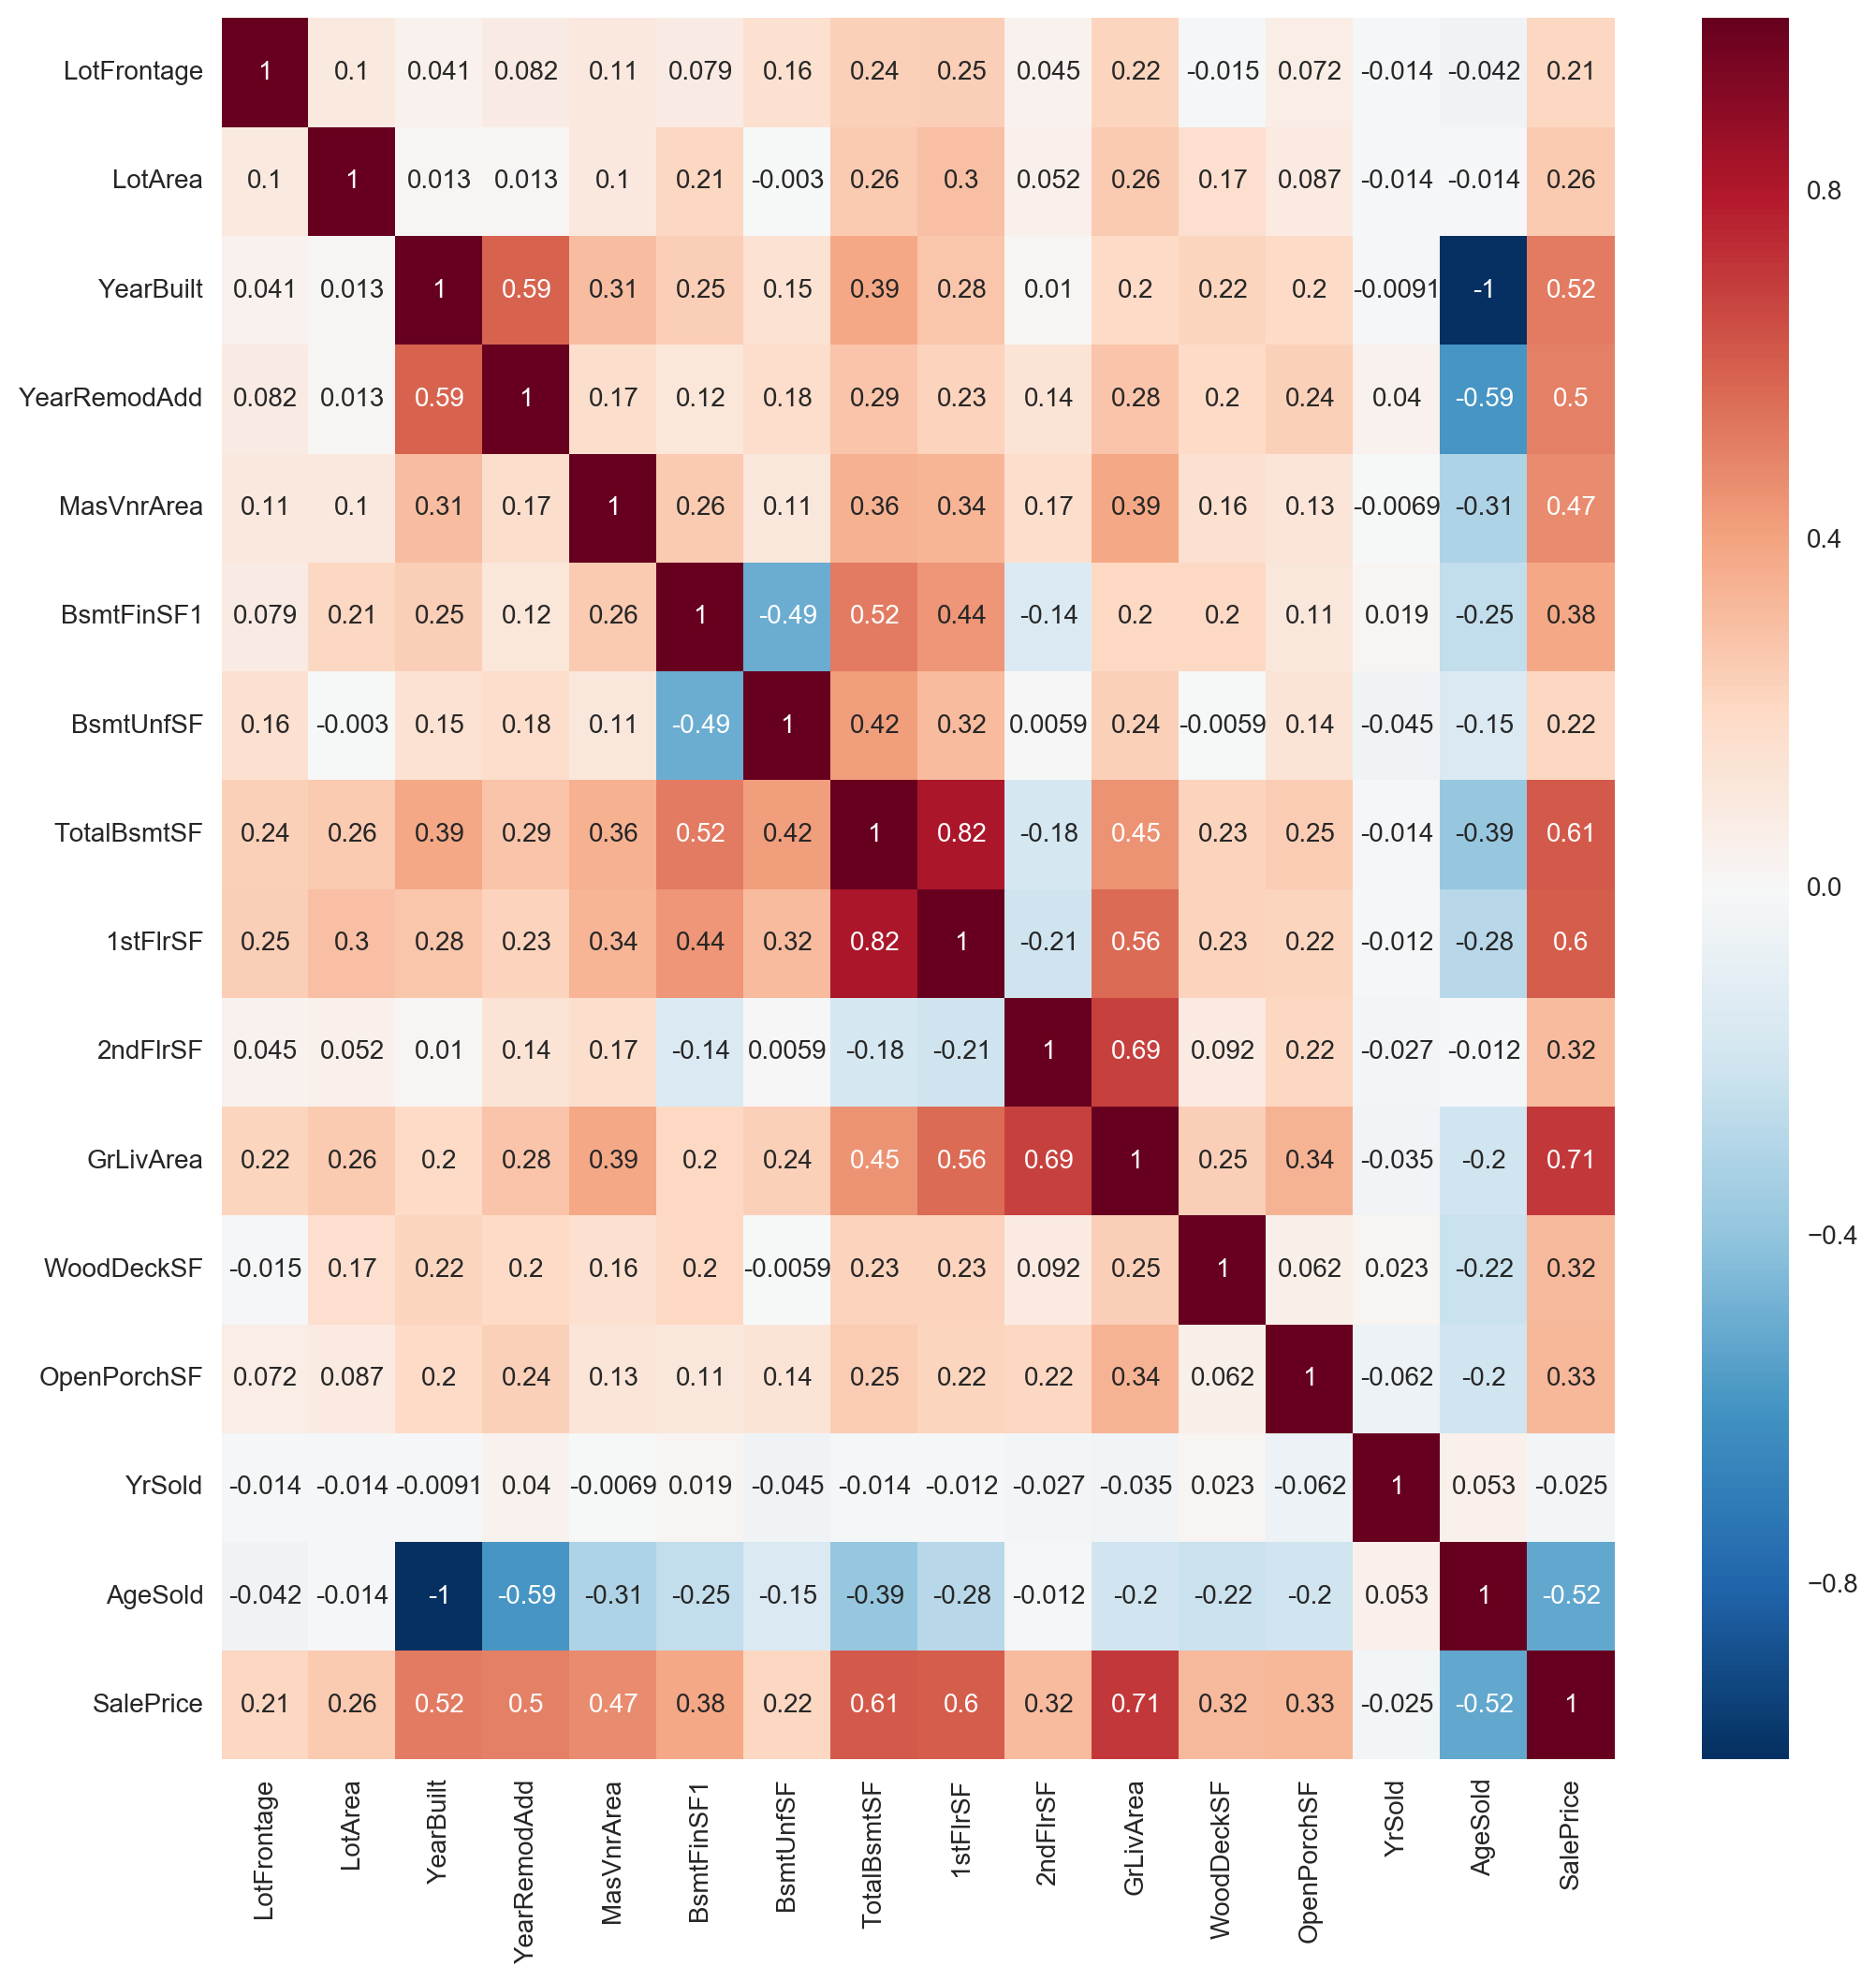

In [146]:
continuous = house[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
             'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'AgeSold', 'SalePrice']]

plt.figure(figsize = (12, 12))
sns.heatmap(continuous.corr(), annot = True)

### Things I notice here:

Columns that have the highest correlation with sale price: 
1. GrLivArea - Above ground living area
2. TotalBsmtSF - Area of the basement (square feet)
3. 1stFlrSF - Area of the first floor (square feet)
4. YearBuilt, AgeSold - Year Built (along with Age Sold), they are pretty much the same here as we are only looking at houses sold in a 5 year period.
5. YearRemodAdd - Year the house was remodeled.
6. MasVnrArea - Masonry Veneer Area (square feet)

I was surprised by the total basement area variable being so high. I would have thought that the age of the house would have a stronger correlation.

I was also surprised about the masonry veneer. That might have something to do with the neighborbood, I would like to investigate this further.

I was expecting the year sold column to have more of an effect, but them I looked at the range of years here and saw that the range of years was pretty small. It's important to know in order to calculate age sold but not immensly important.

Lot Area does not have a huge effect here, which I don't think is really surprising from examining the scatterplot earlier.

In [145]:
print(house['YrSold'].min(), house['YrSold'].max())

(2006, 2010)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

In [147]:
print(house.columns)

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

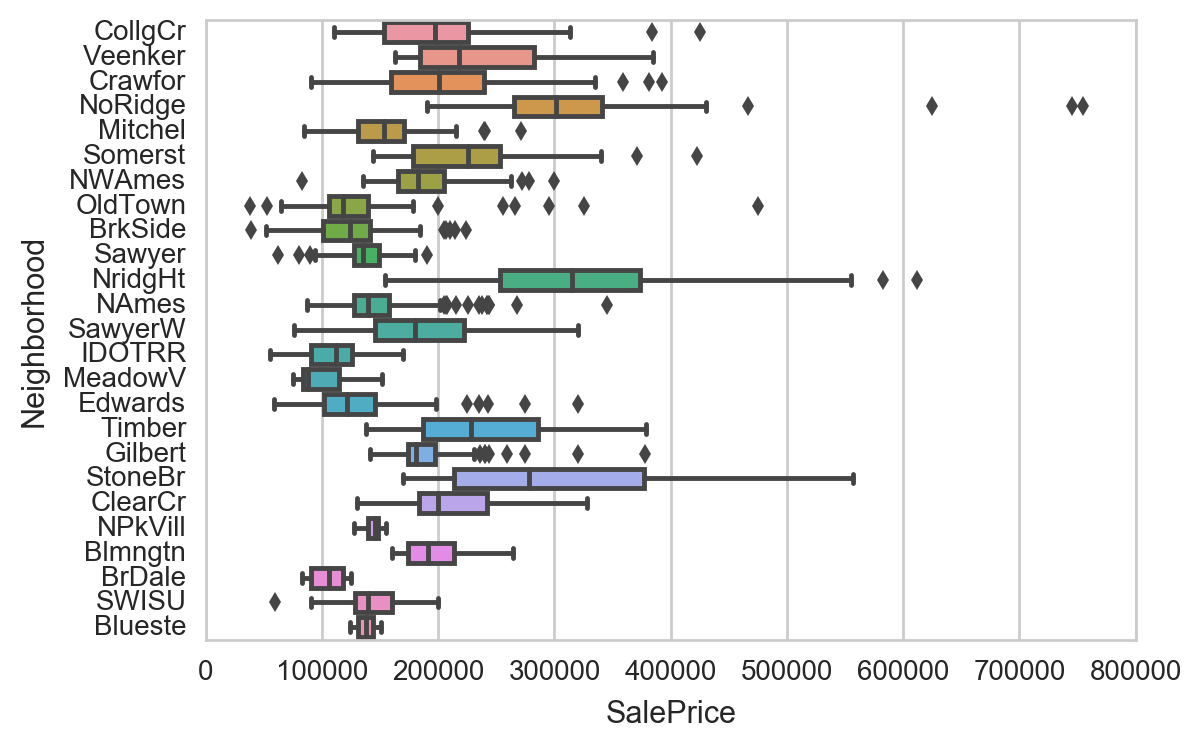

In [152]:
sns.boxplot(x = house['SalePrice'], y = house['Neighborhood'])

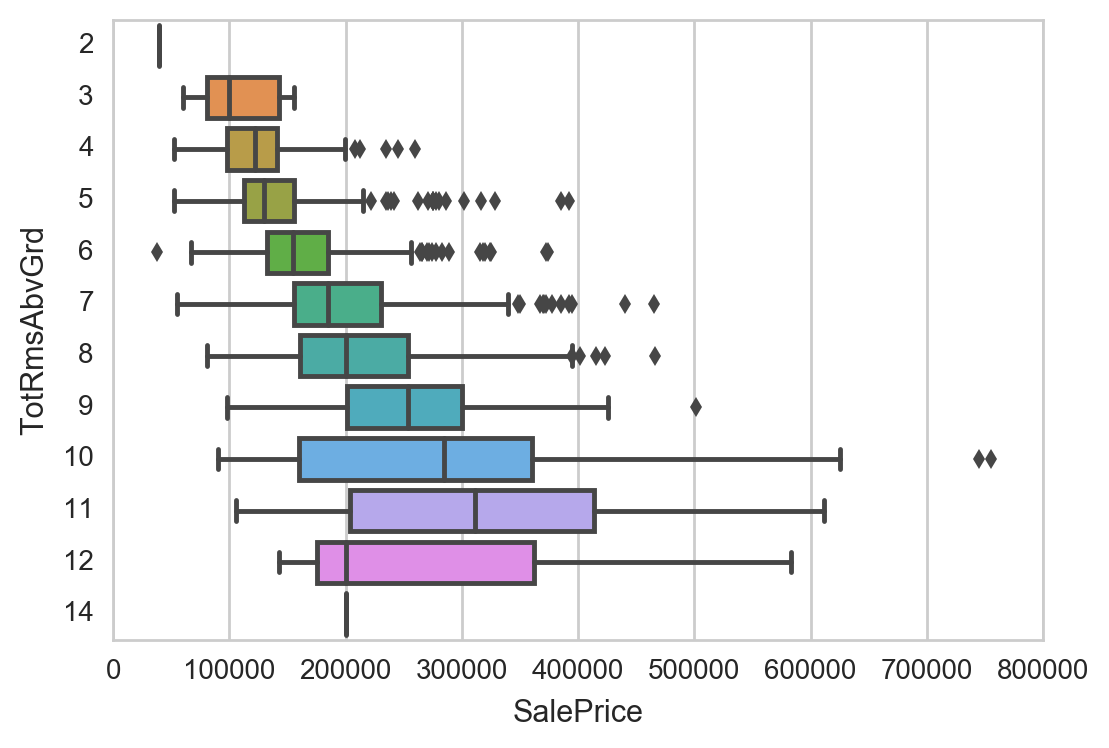

In [162]:
sns.boxplot(y = house['TotRmsAbvGrd'], x = house['SalePrice'], orient = 'h')

#There is only one two bedroom house. 

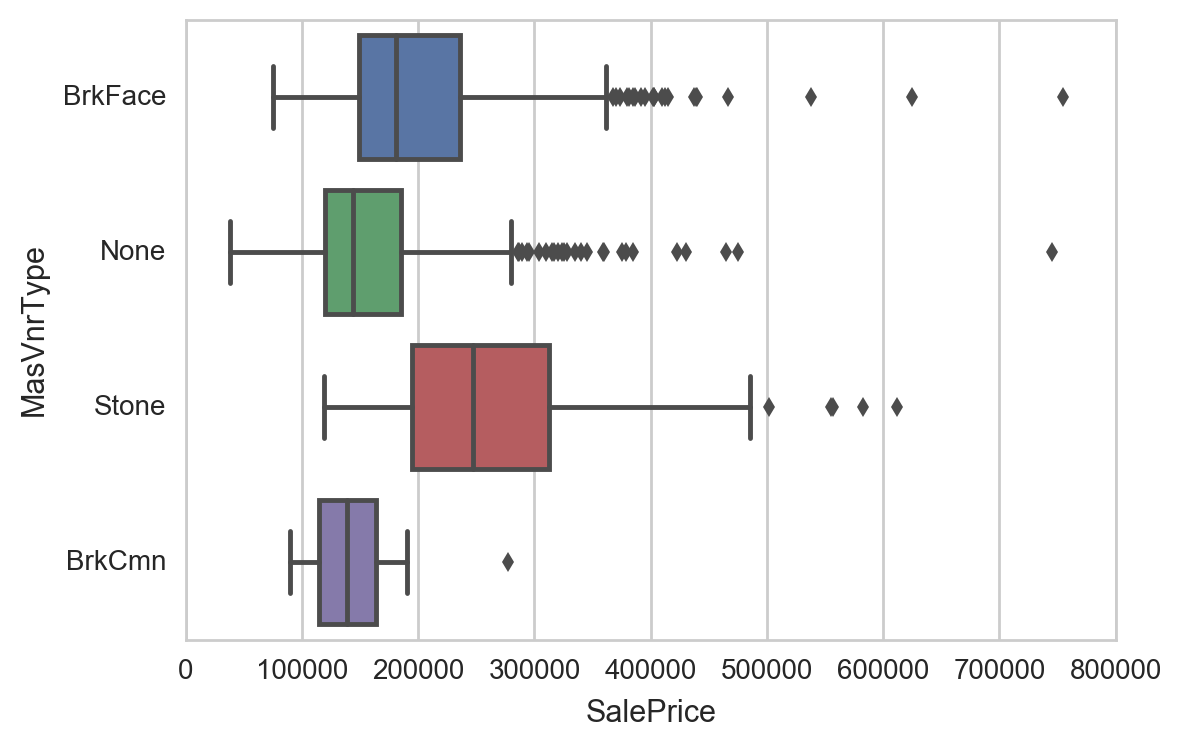

In [163]:
sns.boxplot(y = house['MasVnrType'], x = house['SalePrice'], orient = 'h')

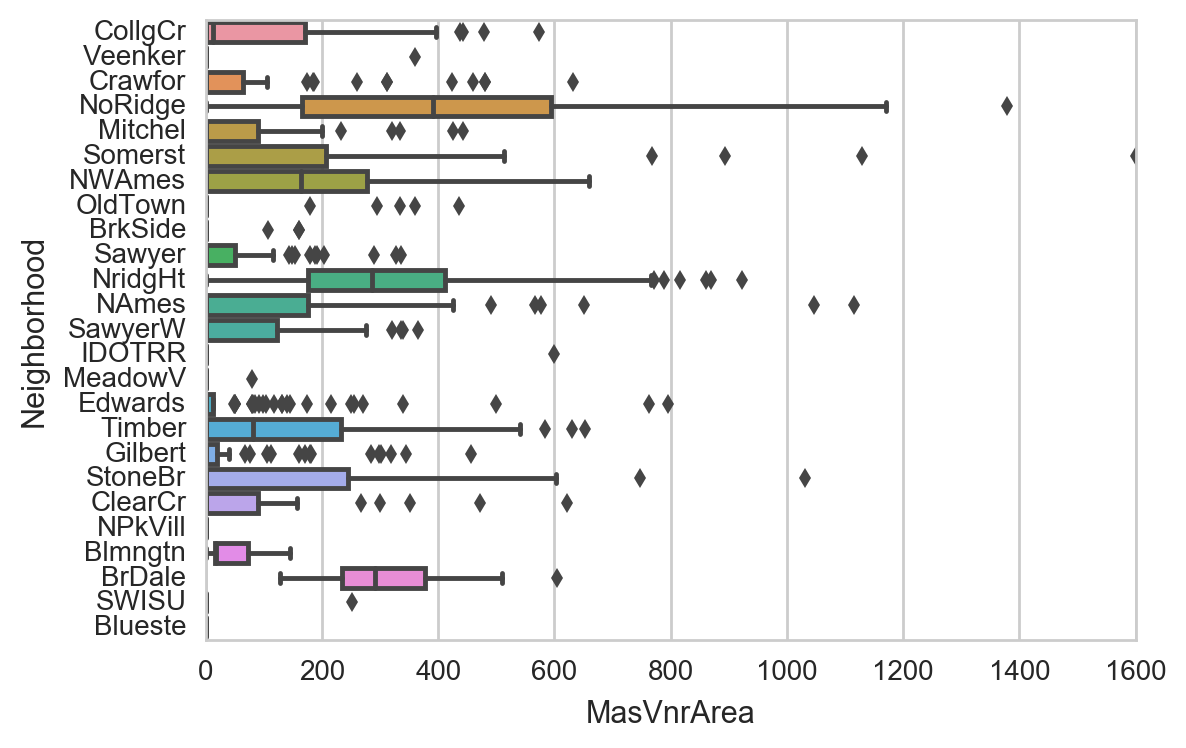

In [164]:
sns.boxplot(x = house['MasVnrArea'], y = house['Neighborhood'], orient = 'h')

#As I suspected, the neighborhoods with high sales prices seem to have a higher area of masonry veneer, 
#which helps explain masonry veneers correlation with sales price.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

### 8.2 Calculate the $R^2$ of your model.

### 8.3 Plot the residuals against the true values.

### 8.4 Plot a histogram of the residuals.

### 8.5 Make a plot to show the strength of the different coefficients.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

### 9.2 Fit a linear regression using all of the predictors and score it.

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

### 10.2 What does the cross-validated average $R^2$ tell you?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**